In [1]:
# Cleaning the data

In [50]:
# Clean the data file by removing non-text (e.g. emojis, smart quotes) and regularizing text 
#(e.g. tokenization, lower casing, stemming, lemmatizing, POS tagging, stop word removal, removing punctuation, spelling correction)
import demoji
import json
import spacy
from spacy.lang.en import English
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer

path= "faqsFromPdf.json"
with open(path, 'r') as json_file:
    text = json.load(json_file)

categories = []
all_text = ""
for key, faq_list in text.items():
    # print(key)
    group_text = ""
    # category = faq_item["question"] + " " + faq_item["answer"]
    # categories.append(category)

    for faq_item in faq_list:
        all_text += faq_item["question"] + " " + faq_item["answer"] + " "
        group_text += faq_item["question"] + " " + faq_item["answer"] 
    categories.append(group_text)
# Cleaning and preprocessing the text
# Removing emojis
clean_text = demoji.replace(all_text,"")
#remove smart quotes
clean_text = clean_text.replace("“", "\"").replace("”","\"")
# convert text to lower-case
clean_text = clean_text.lower()

spell = SpellChecker()
stemmer = PorterStemmer()

# Find and correct spelling errors
corrected_text = []
clean_text=clean_text.split()
for word in clean_text:
    # Check if the word is misspelled
    if spell.unknown([word]):
        # Get the corrected version of the word
        corrected_word = spell.correction(word)
        # Check if the corrected word is not None
        if corrected_word is not None:
            corrected_text.append(corrected_word)
        else:
            # If the correction is None, keep the original word
            corrected_text.append(word)
    else:
        corrected_text.append(word)
# Join the corrected words back into a string
corrected_text = " ".join(corrected_text)   

#Tokenzing using Spacy with removing white spaces, stop words, and punctuations
nlp = spacy.load('en_core_web_sm')
doc = nlp(corrected_text)

# Lemmatize and stem the words
lemmatized_and_stemmed_words = []
for token in doc:
    lemma = token.lemma_
    stem = stemmer.stem(token.text)  # Use Porter Stemmer
    lemmatized_and_stemmed_words.append((token.text, lemma, stem))
# print(lemmatized_and_stemmed_words)
clean_words = [token.text for token in doc if not (token.is_space or token.is_stop or token.is_punct)]
posArray = [(token.text, token.pos_) for token in doc if not (token.is_space or token.is_stop or token.is_punct)]

# print(clean_words)
with open("cleaned_data.txt", "w", encoding='utf-8') as txt_file:
     txt_file.write(str(clean_words))
# print(posArray)

In [59]:
import nltk
import matplotlib.pyplot as plt

In [60]:
freq = nltk.FreqDist(clean_words)
#common words 
print("Common Words:", freq.most_common(20))
with open("common_words.txt", "w", encoding='utf-8') as txt_file:
     txt_file.write(str(freq.most_common(20)))

Common Words: [('program', 126), ('housing', 102), ('campus', 98), ('students', 96), ('yellow', 55), ('ribbon', 55), ('pacific', 54), ('units', 50), ('student', 44), ('available', 44), ('apply', 38), ('sacramento', 37), ('plan', 34), ('university', 33), ('admission', 33), ('office', 30), ('sign', 30), ('work', 29), ('application', 29), ('required', 29)]


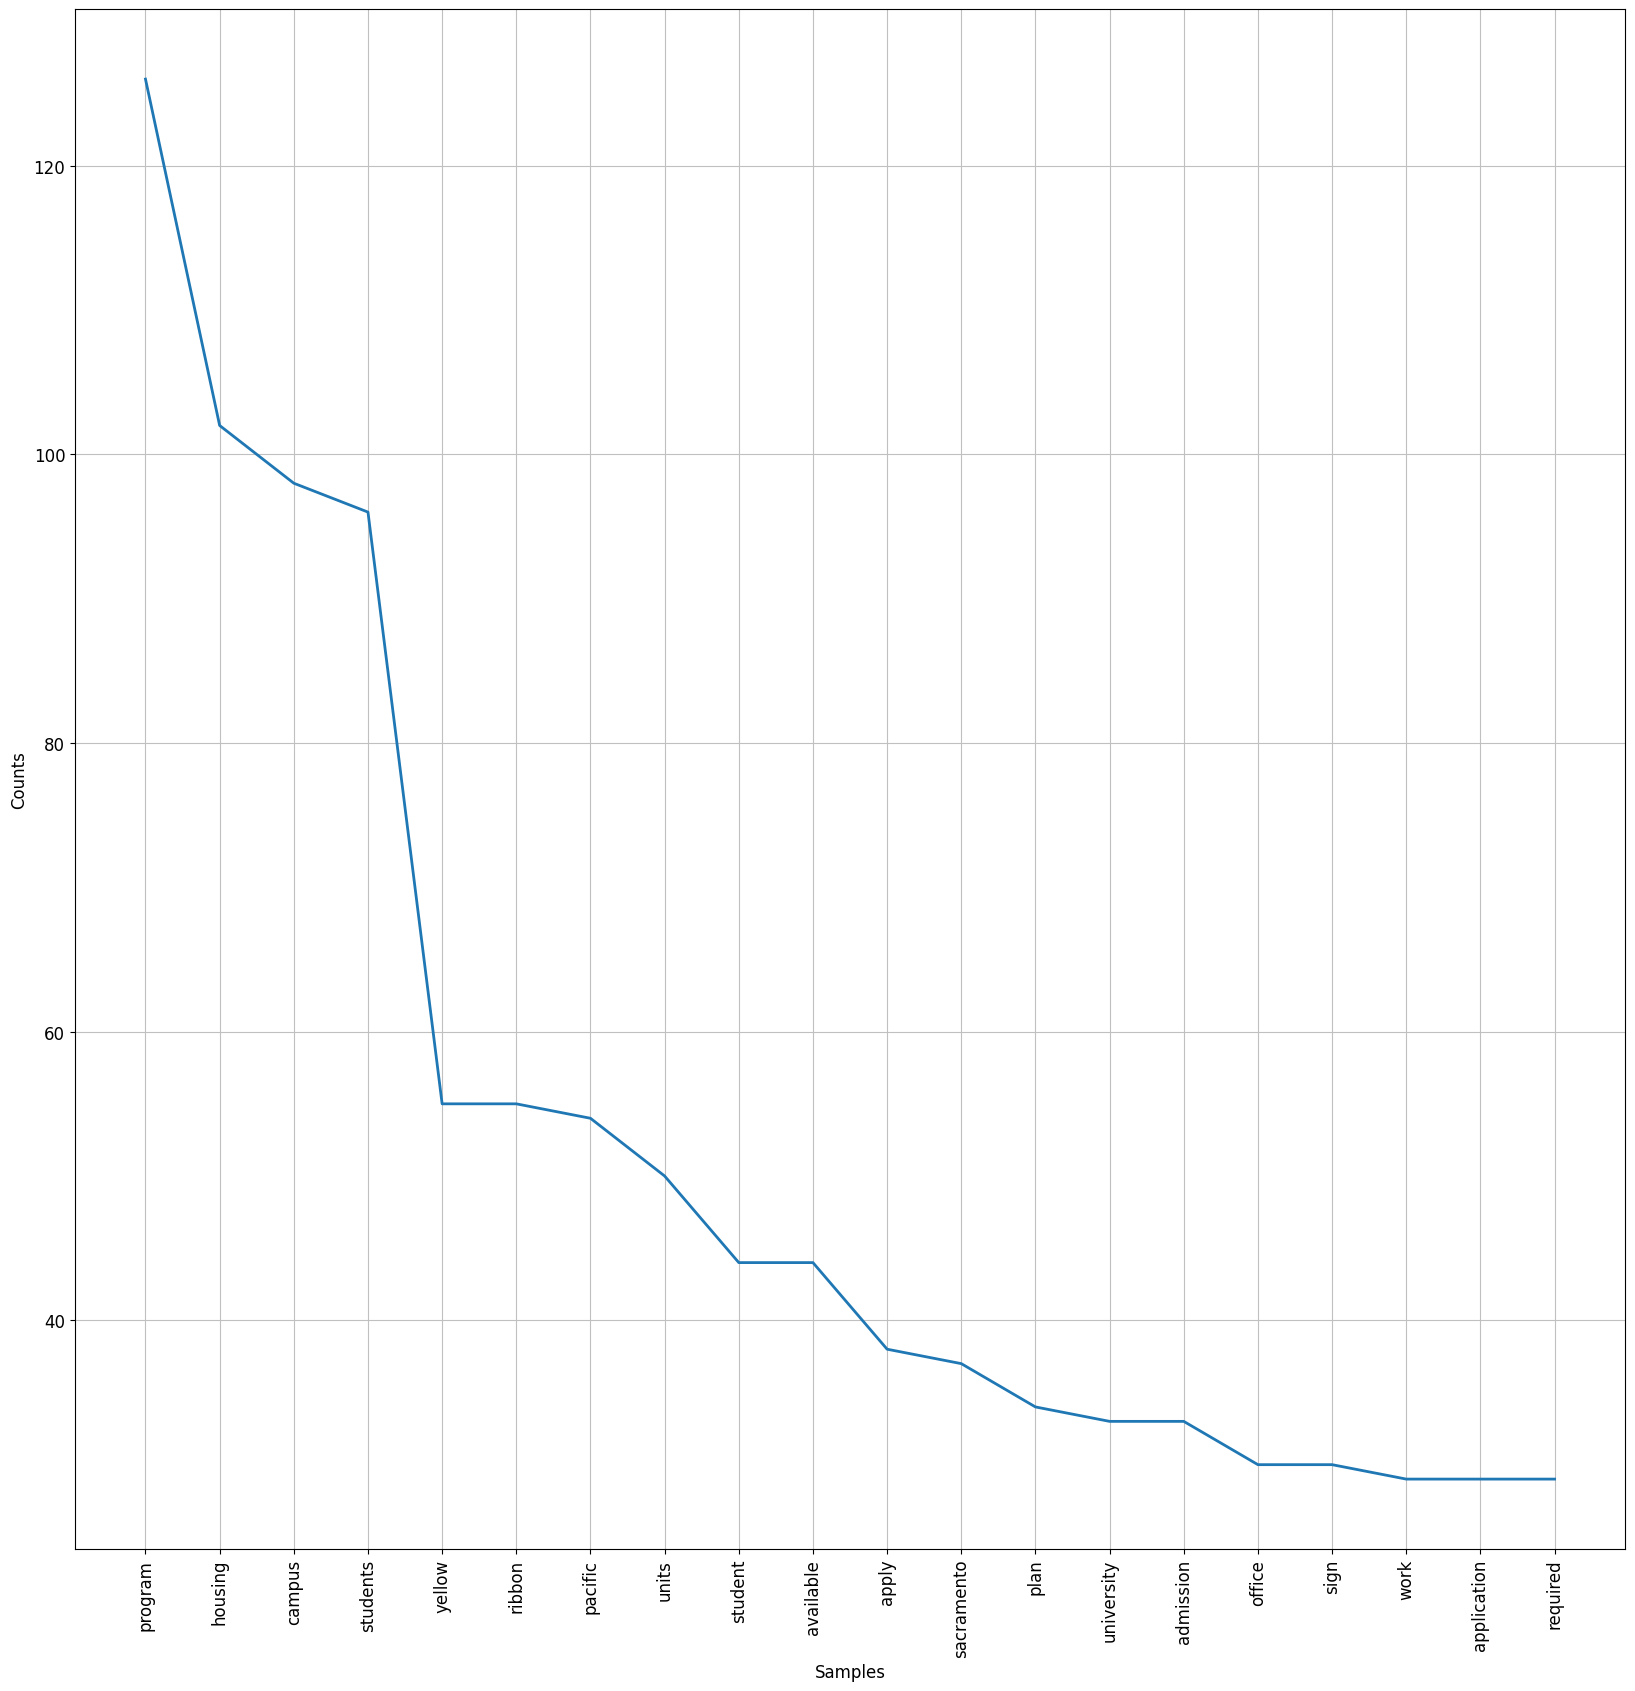

<Axes: xlabel='Samples', ylabel='Counts'>

In [61]:
freq.plot(20,cumulative = False)

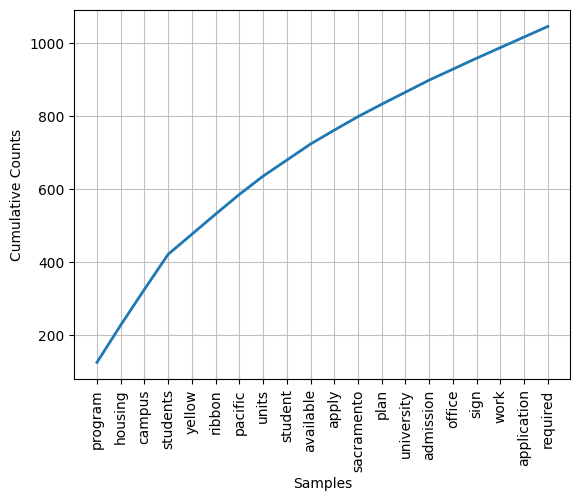

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [10]:
# display the frequency of each of the 50 words (cumulative=False)
freq.plot(20,cumulative = True)


plotted
added title


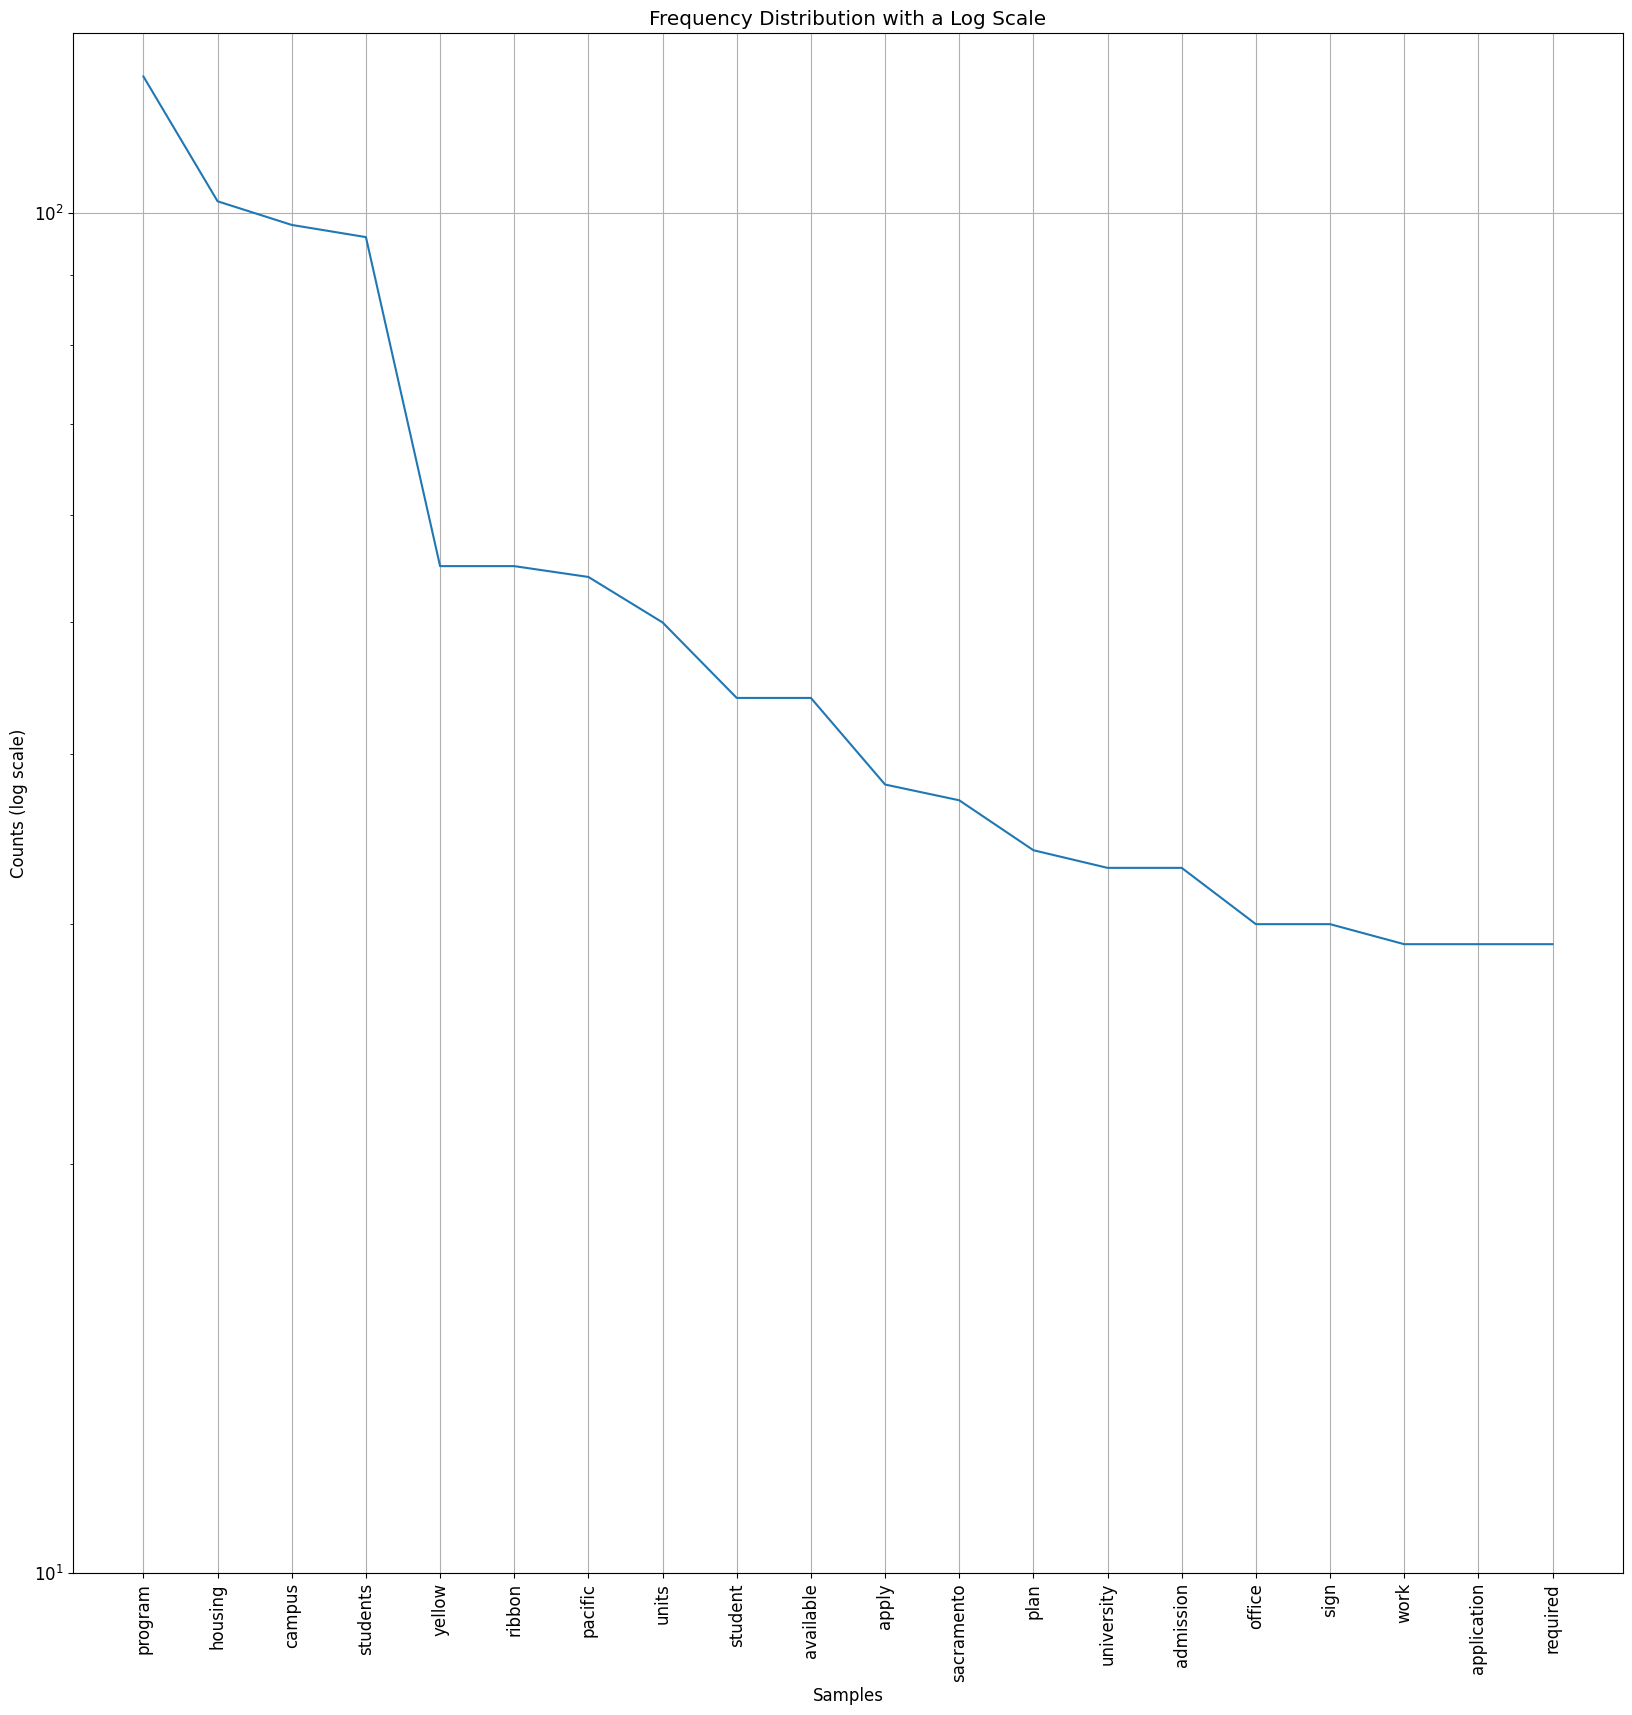

In [62]:
# Plot the frequency distribution with a log scale on the y-axis
plt.plot(*zip(*freq.most_common(20)))
print("plotted")
plt.yscale('log')
plt.xlabel('Samples')
plt.ylabel('Counts (log scale)')
plt.title('Frequency Distribution with a Log Scale')
plt.xticks(rotation = 90)
plt.grid(True)

# Set y-axis tick labels at each power of 10
y_ticks = [10**i for i in range(int(min(freq.values())), int(max(freq.values()))+1) if 10**i <= max(freq.values())]
plt.yticks(y_ticks)

print("added title")
# Save the plot as an image (e.g., PNG)
plt.savefig("FrequencyDistribution1.png")
plt.show()

In [ ]:
# Data Visualization with Matplotlib, Seaborn, and pandas

C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


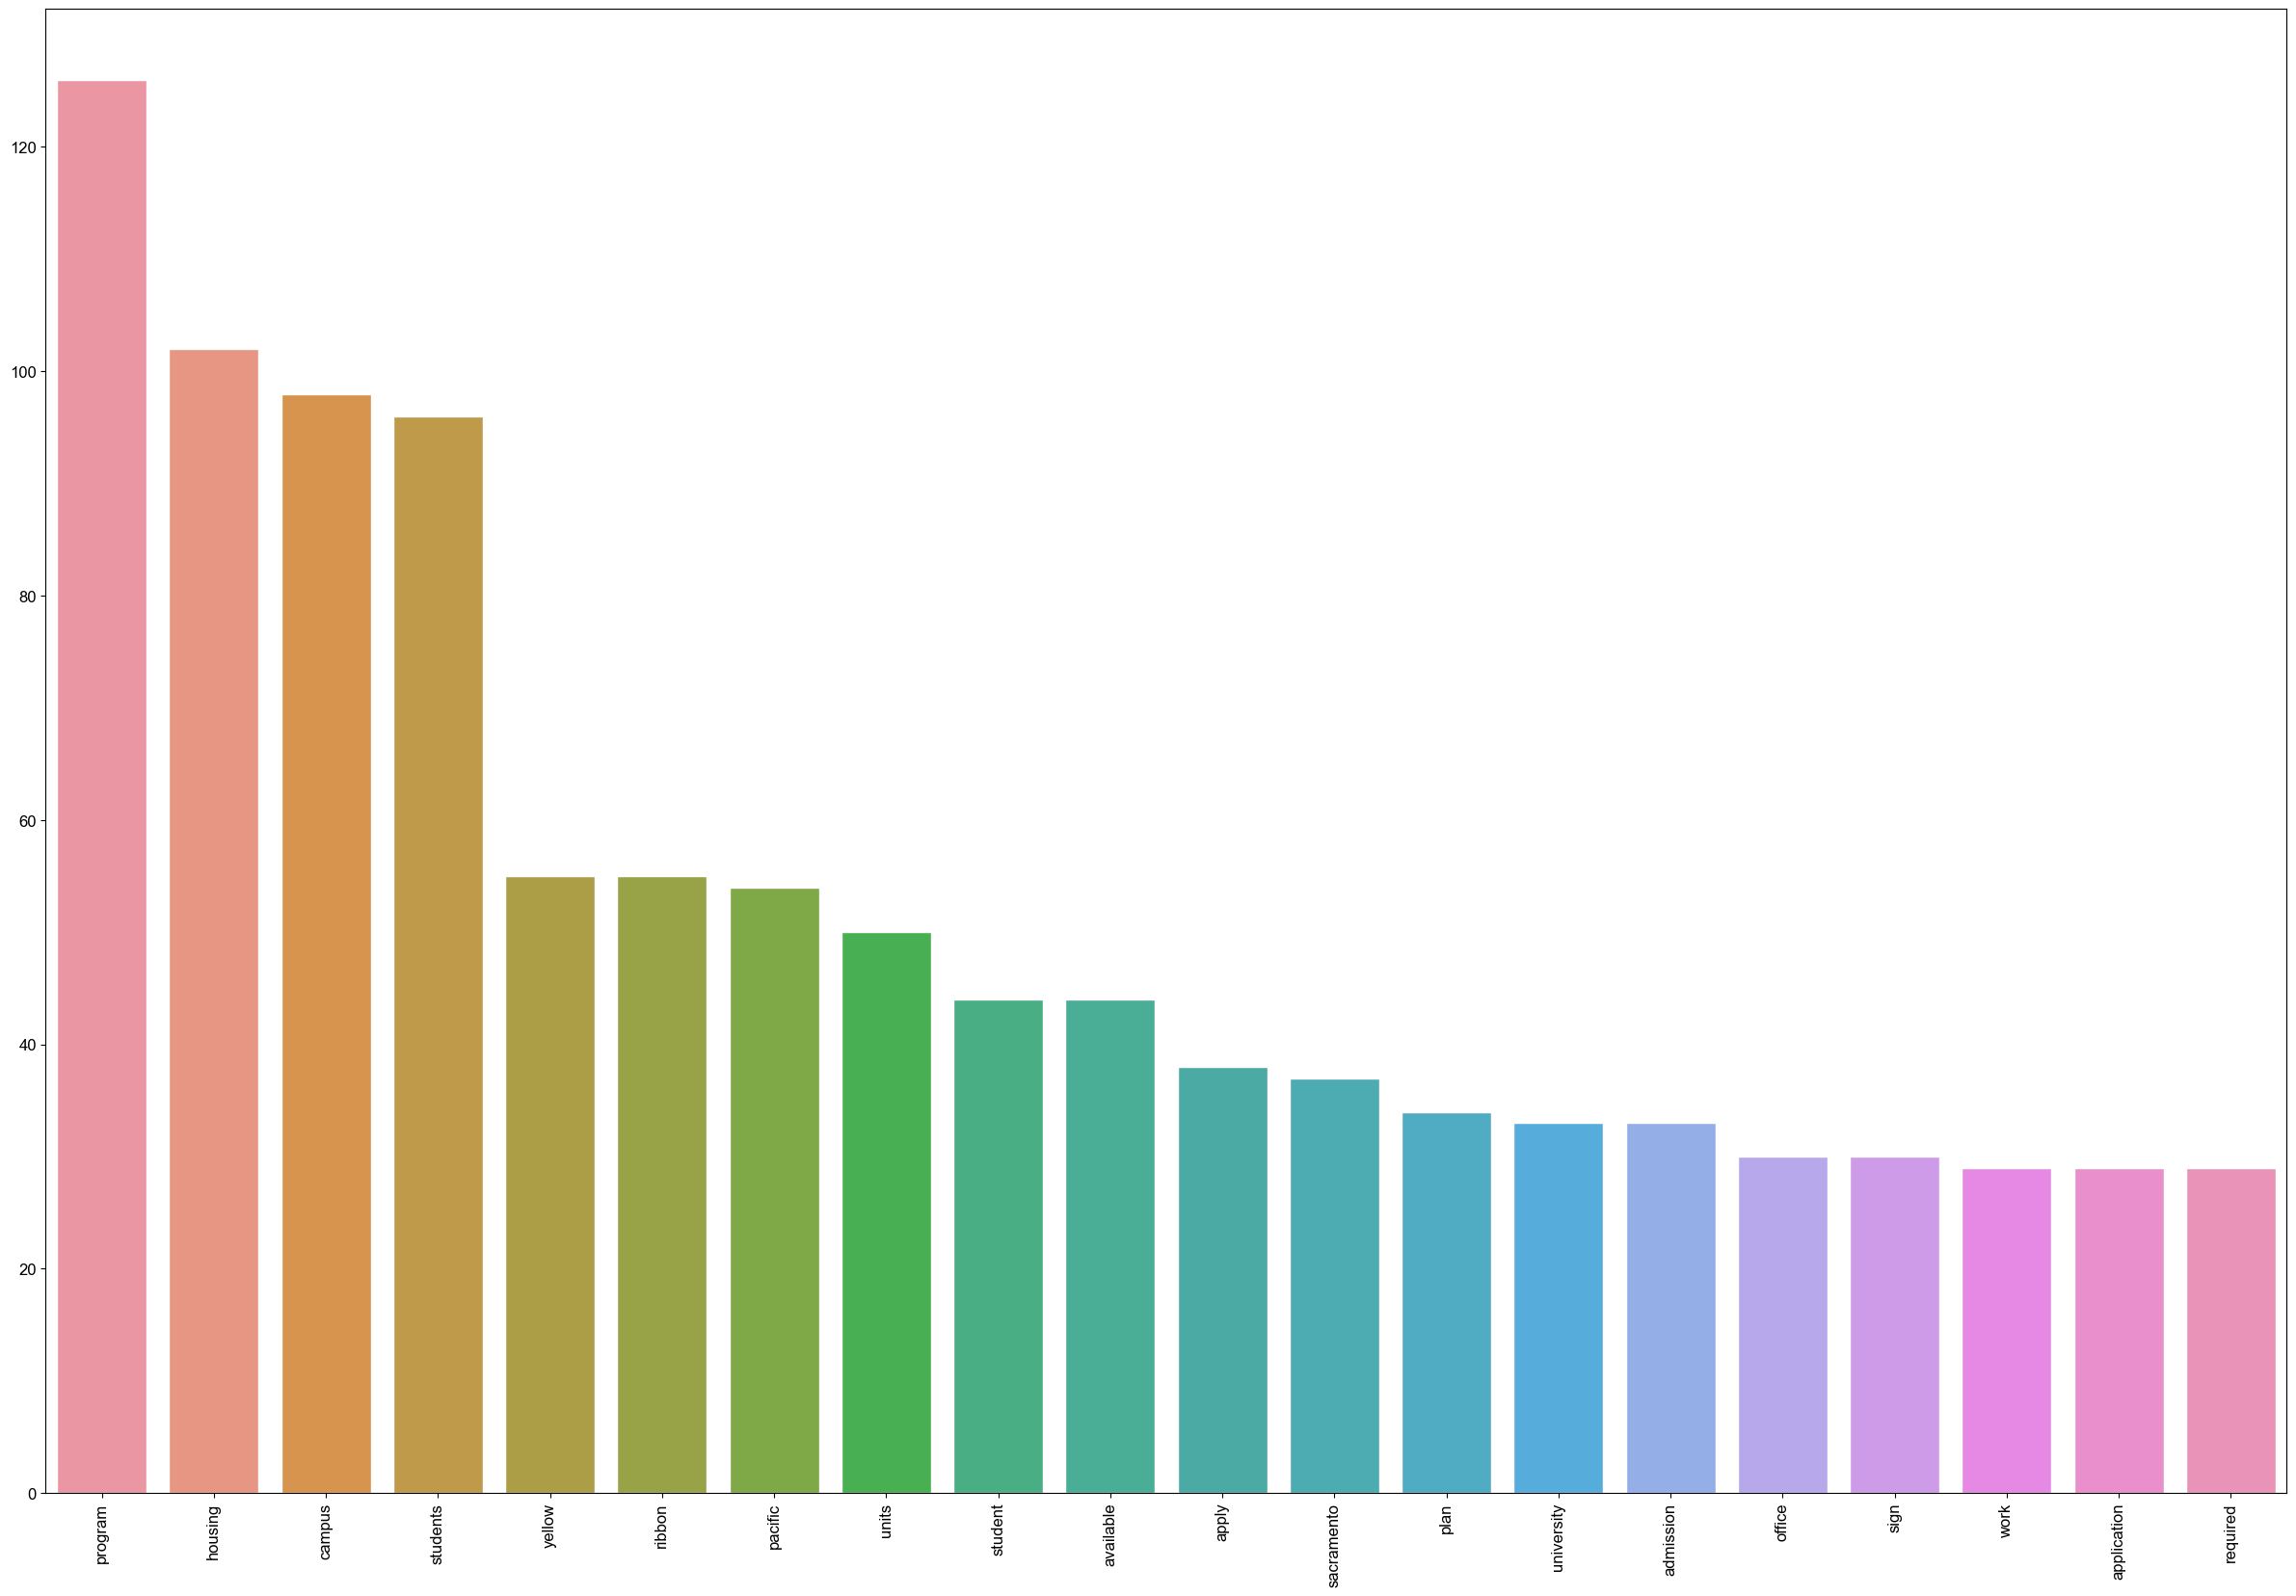

In [63]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

frequency_cutoff = 20
all_fdist = nltk.FreqDist(clean_words).most_common(frequency_cutoff)

# Convert to Pandas series
all_fdist = pd.Series(dict(all_fdist))

# Create figure and axis variables and set size for the x and y axes
fig, ax = plt.subplots(figsize=(30,20))

# Seaborn plotting using Pandas attributes 
sns.set(font_scale=3)
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
# rotate the x-axis labels for better display
plt.xticks(rotation=90);

# Save the plot as an image (e.g., PNG)
plt.savefig("FrequencyDistribution2.png")

plt.show()

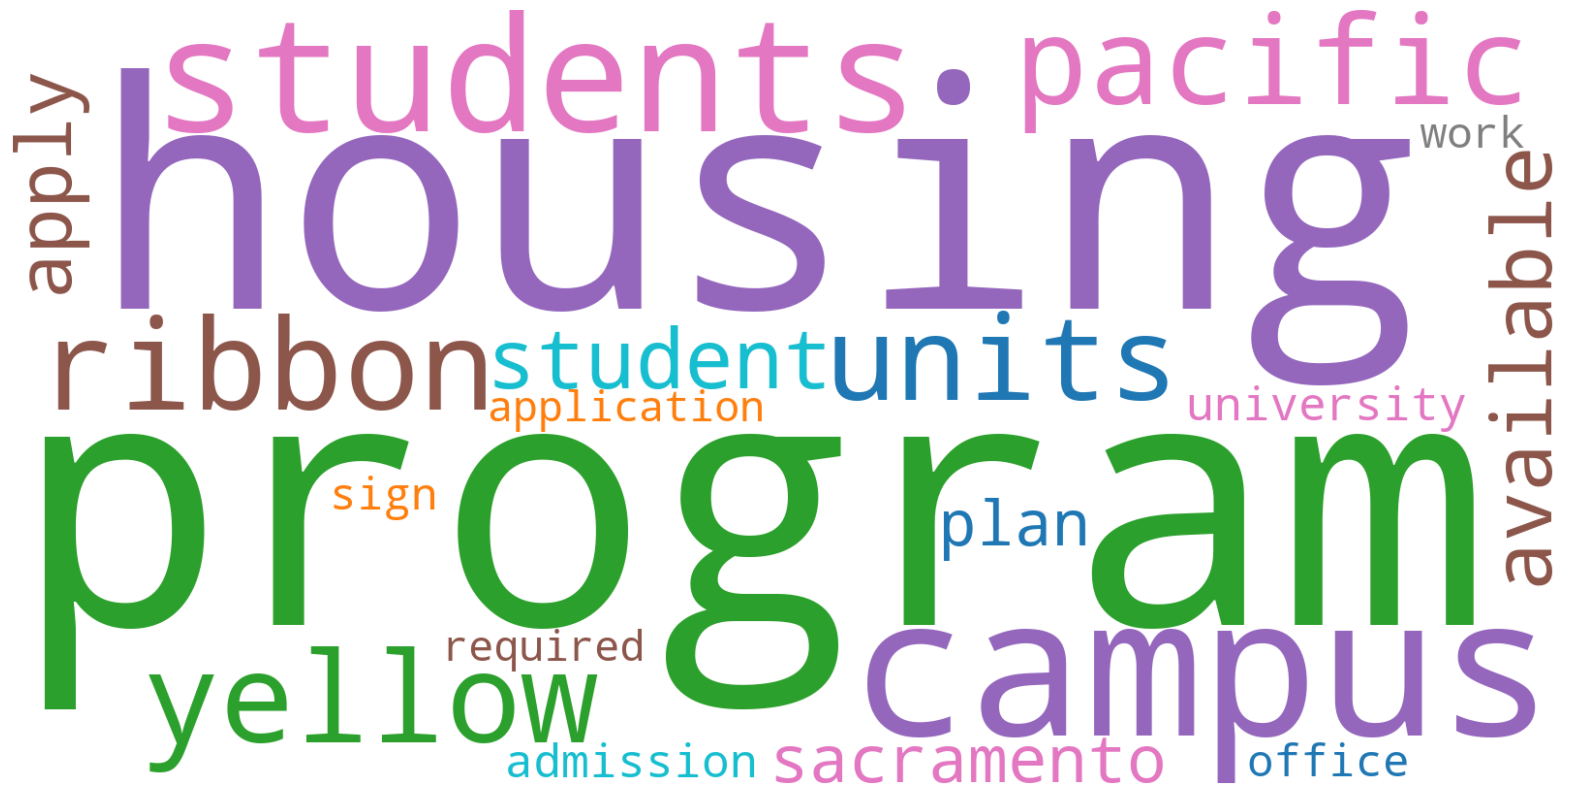

In [64]:
# show a wordcloud without stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

frequency_cutoff = 20
all_fdist = nltk.FreqDist(clean_words).most_common(frequency_cutoff)
all_fdist = pd.Series(dict(all_fdist))

long_words = dict([(m, n) for m, n in all_fdist.items() if len(m) > 2])
wordcloud = WordCloud(width=1600, height=800,colormap="tab10",background_color="white").generate_from_frequencies(long_words)
plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the plot as an image (e.g., PNG)
plt.savefig("FrequencyDistribution3.png")

plt.show()

C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


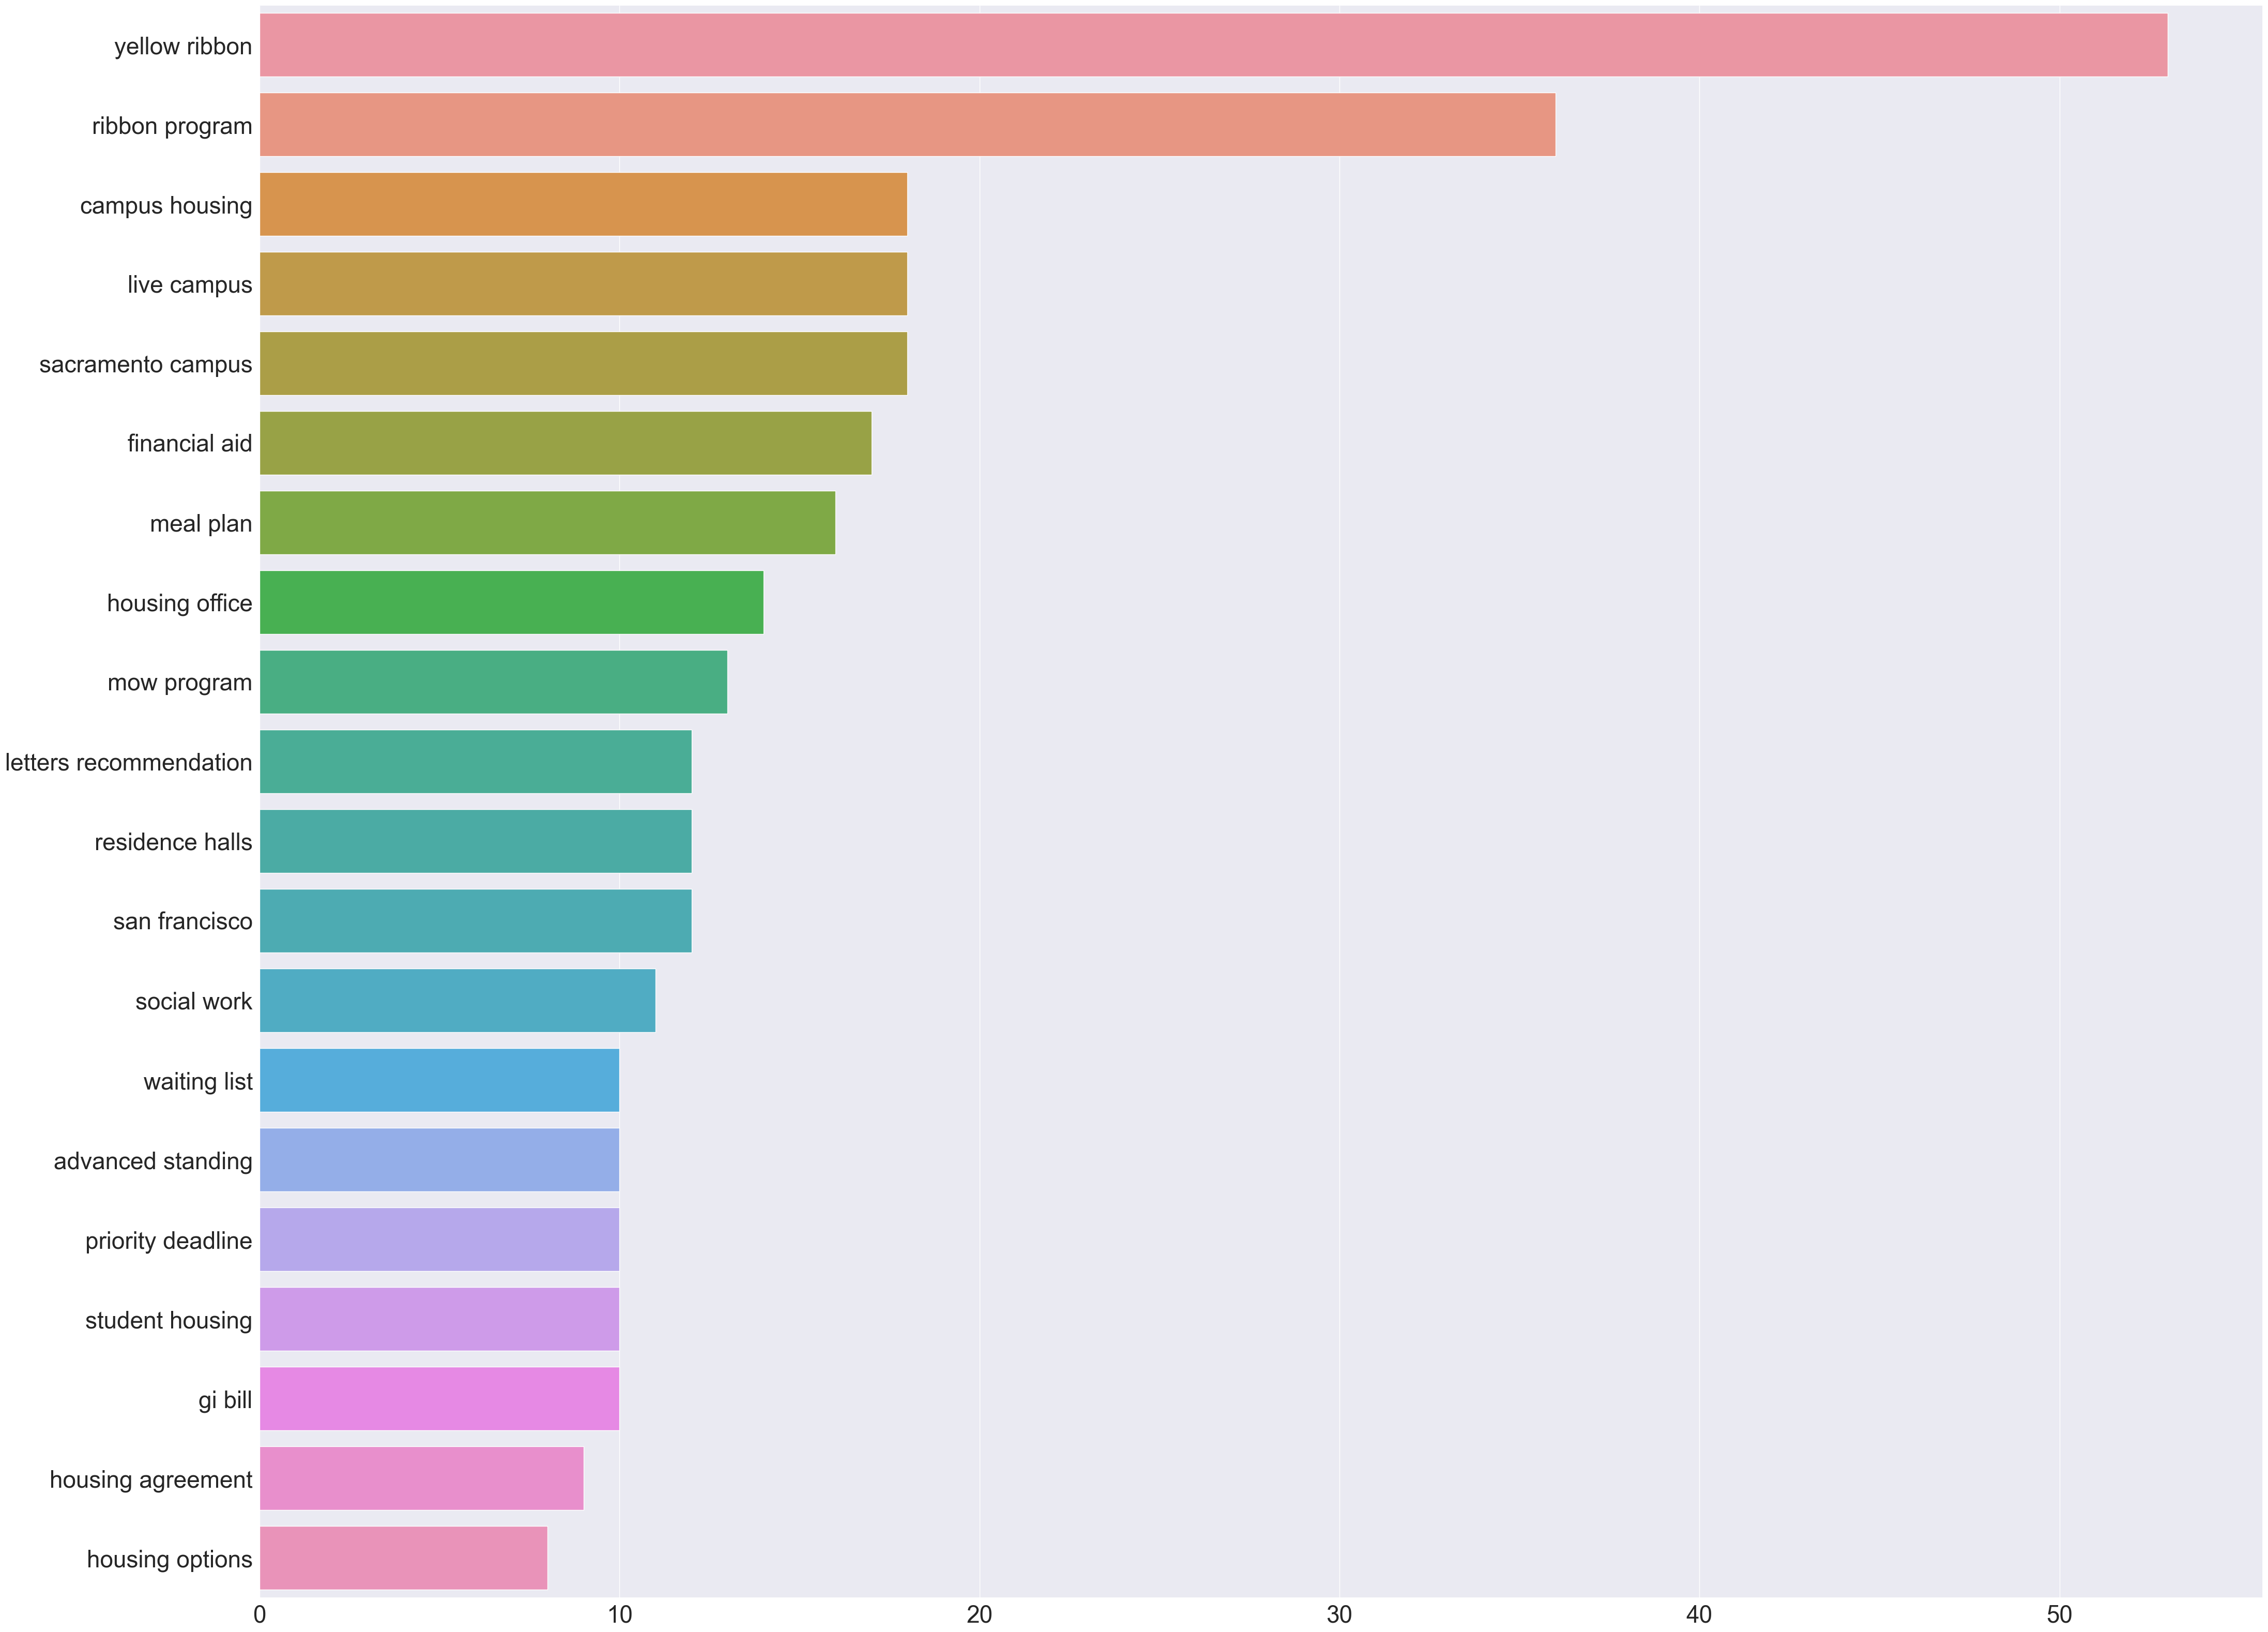

In [65]:
# bigram frequencies
import nltk
from nltk.util import ngrams
from nltk.corpus import movie_reviews

frequency_cutoff = 20


# collect the bigrams in the corpus
bigrams = ngrams(clean_words,2)

# make a list from the bigrams
list_bigrams = list(bigrams)

# put together the bigrams into a single string
consolidated_bigrams = []
for bigram in list_bigrams:
    consolidated_bigram = bigram[0] + " " + bigram[1]
    consolidated_bigrams.append(consolidated_bigram)
    
# make a frequency distribution from the bigrams

freq_bigrams = nltk.FreqDist(consolidated_bigrams).most_common(frequency_cutoff)
# Convert to a Pandas series
all_fdist = pd.Series(dict(freq_bigrams))

# set figure and axis variables and set sizes for the x and y axes
fig, ax = plt.subplots(figsize=(50,40))

# create a bar graph using Seaborn
sns.set(font_scale=2)
# display the bigrams on the y-axis and the counts on the x-axis
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax)
# Save the plot as an image (e.g., PNG)
plt.savefig("Bigrams.png")
plt.show()


In [66]:
# prepare the BoW
import random

# print(categories[0])
all_words = nltk.FreqDist(w for w in clean_words)
max_words = 1000
word_features = list(all_words)[:max_words]

def document_features(document):
    features = {}
    for word in word_features:
        if word in document:
            features[word] = 1
        else:
            features[word] = 0
    return features

# Create a list of documents
documents = [(text, category) for text in clean_words for category in categories]

random.shuffle(documents)

# collect features, that is, words that occur in a document
featuresets = [(document_features(document), category) for (document,category) in documents]

#remove categories for display
docnumber = 0
new_featuresets = {}
for featureset in featuresets:
    new_featureset = featureset[0]
    new_featuresets[docnumber]= new_featureset
    docnumber += 1
    
# display the words that occur in the first 10 documents, the bag of words
df_featuresets = pd.DataFrame.from_dict(data = new_featuresets, orient = 'index', columns = word_features)
df_featuresets.head(10)
df_featuresets.to_csv('bow.csv', index=False)  

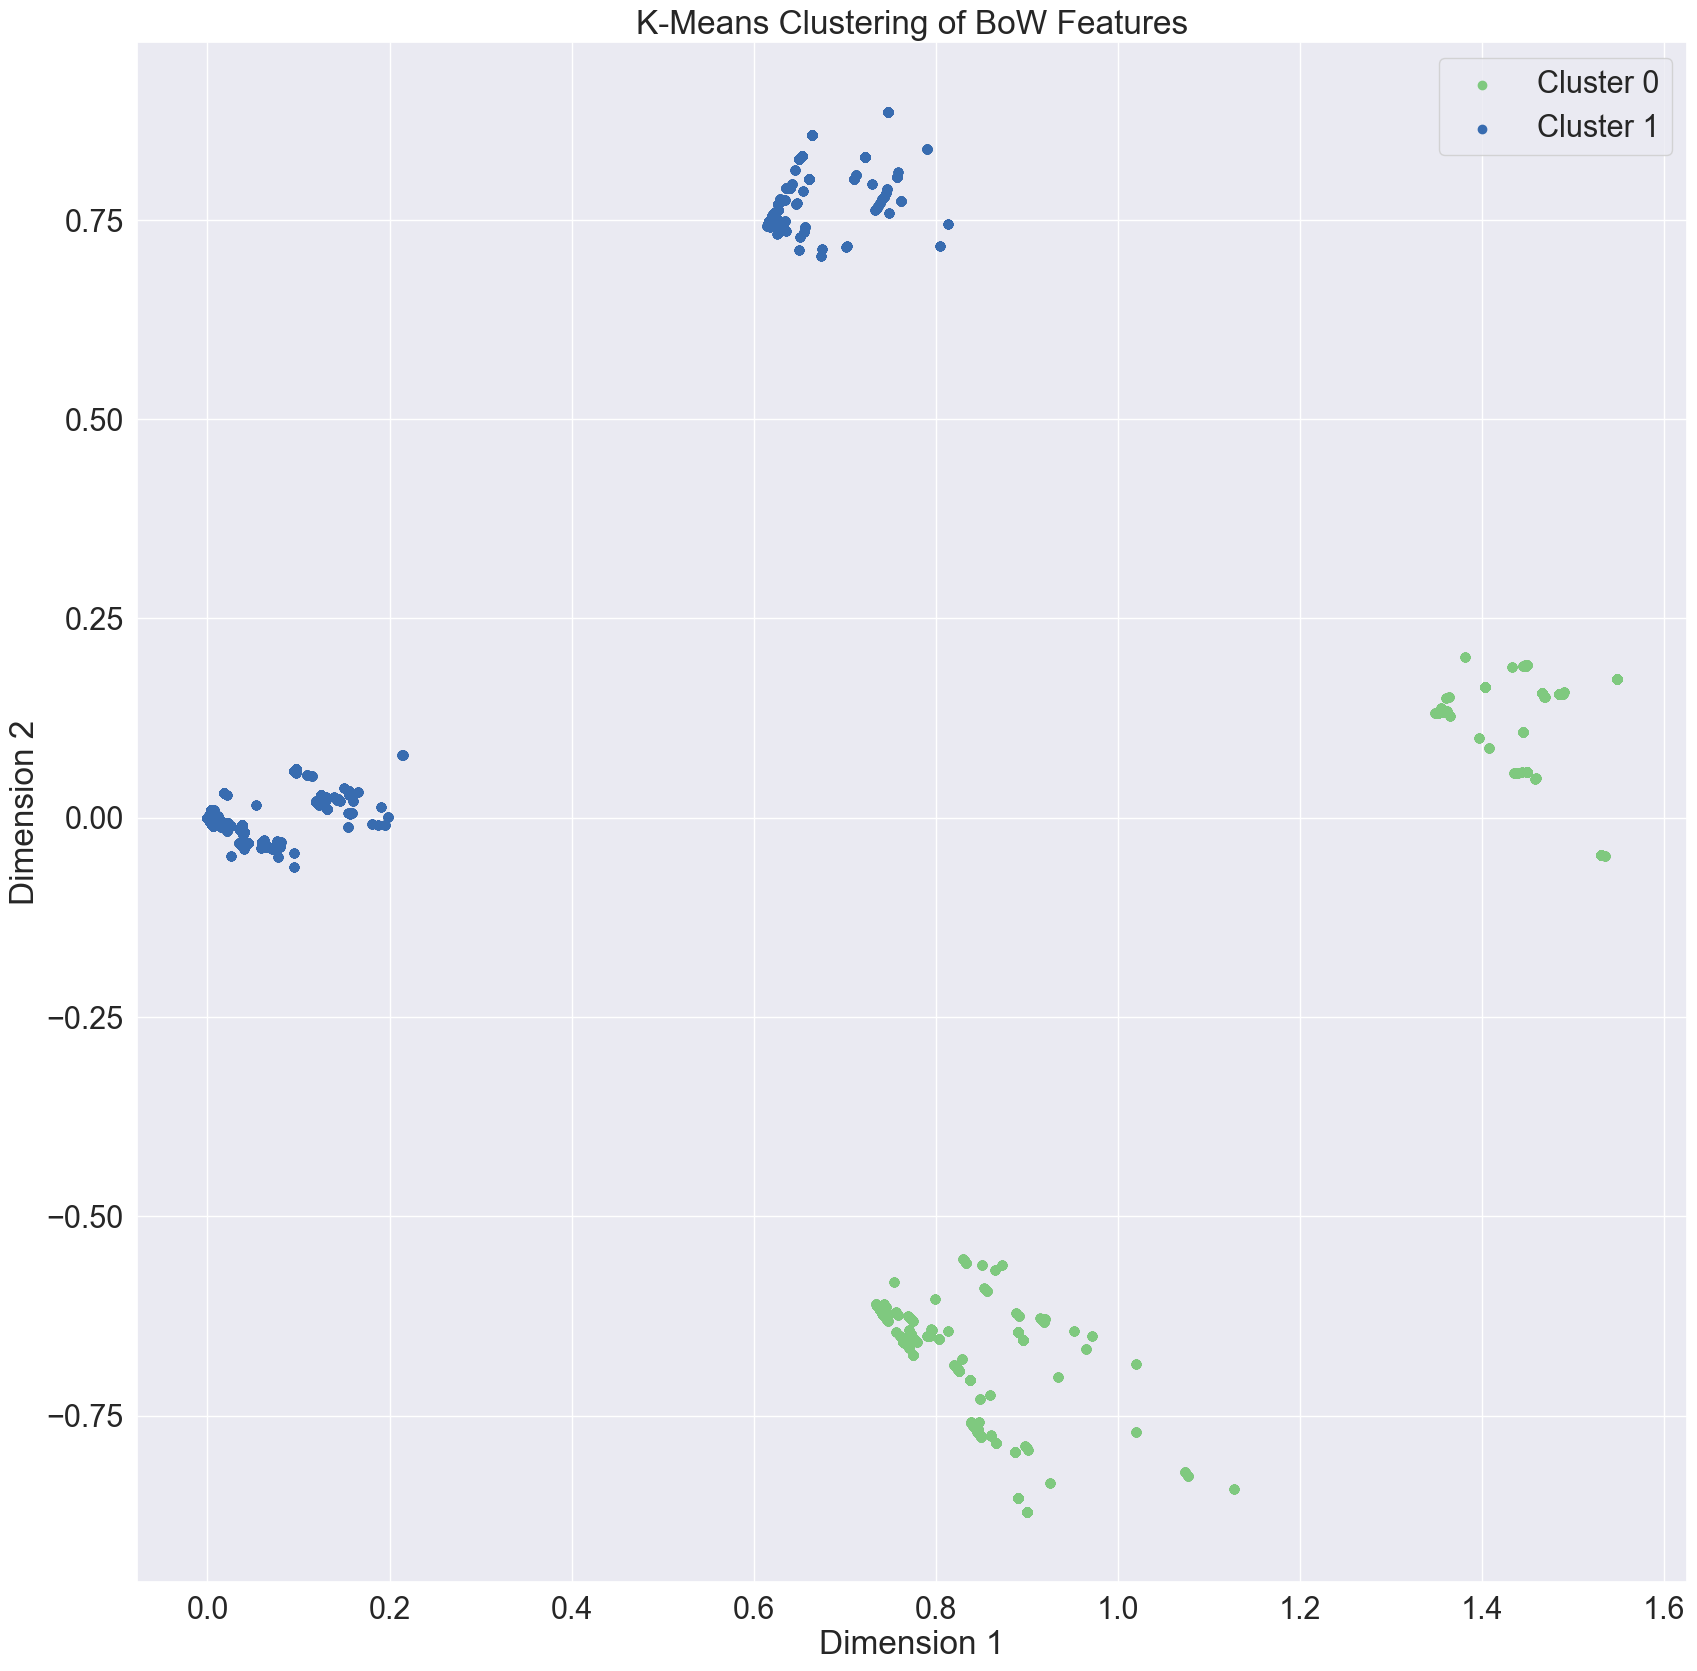

In [71]:
#cluster the BoW with kmeans
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

true_k = 2

# truncatedSVD for reducing dimensions to 2 for display
truncatedSVD = TruncatedSVD(n_components = 2)
X_2D = truncatedSVD.fit_transform(df_featuresets)

kmeans = KMeans(n_clusters = true_k, 
               init='k-means++', 
               max_iter=100, # Maximum iterations
               n_init=10)  # Number of times to run the k-means algorithm 

result = kmeans.fit(X_2D)
labels = result.labels_

cm = plt.get_cmap('Accent')

# plot clusters in different colors
for cluster in range(true_k):
    current_color = cm(1.*cluster/(true_k))
    plt.scatter(X_2D[labels == cluster, 0], X_2D[labels == cluster, 1],
            color = current_color, label='cluster ' + str(cluster))

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.size'] = '12'
plt.savefig("KMeans.png")
plt.show()


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example corpus of documents (replace this with your own FAQ data)
corpus = categories

# Initialize the TF-IDF vectorizer with parameters
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')

# Fit and transform the corpus to obtain TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get the TF-IDF feature names (words)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array for easier manipulation
tfidf_matrix_dense = tfidf_matrix.toarray()

# Create a DataFrame to display the TF-IDF values
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns=tfidf_feature_names)

print(tfidf_df)

# Save the TF-IDF data to a CSV file
tfidf_df.to_csv('tfidf_data.csv', index=False)


         11      able  academic  admission  admissions  agreement       aid  \
0  0.000000  0.023430  0.000000   0.000000    0.000000   0.000000  0.000000   
1  0.007517  0.013053  0.052214   0.202279    0.026107   0.000000  0.090210   
2  0.017682  0.061406  0.046054   0.000000    0.000000   0.123772  0.000000   
3  0.000000  0.166770  0.000000   0.000000    0.000000   0.000000  0.000000   
4  0.000000  0.000000  0.030233   0.203692    0.090698   0.121877  0.000000   
5  0.000000  0.000000  0.000000   0.000000    0.362640   0.000000  0.139229   
6  0.087889  0.000000  0.030523   0.000000    0.030523   0.017578  0.017578   

   apartments  applicants  application  ...  transcripts  transferring  \
0    0.063144     0.00000     0.000000  ...      0.00000      0.000000   
1    0.000000     0.14833     0.120280  ...      0.14833      0.000000   
2    0.144802     0.00000     0.017682  ...      0.00000      0.000000   
3    0.000000     0.00000     0.000000  ...      0.00000      0.000000 

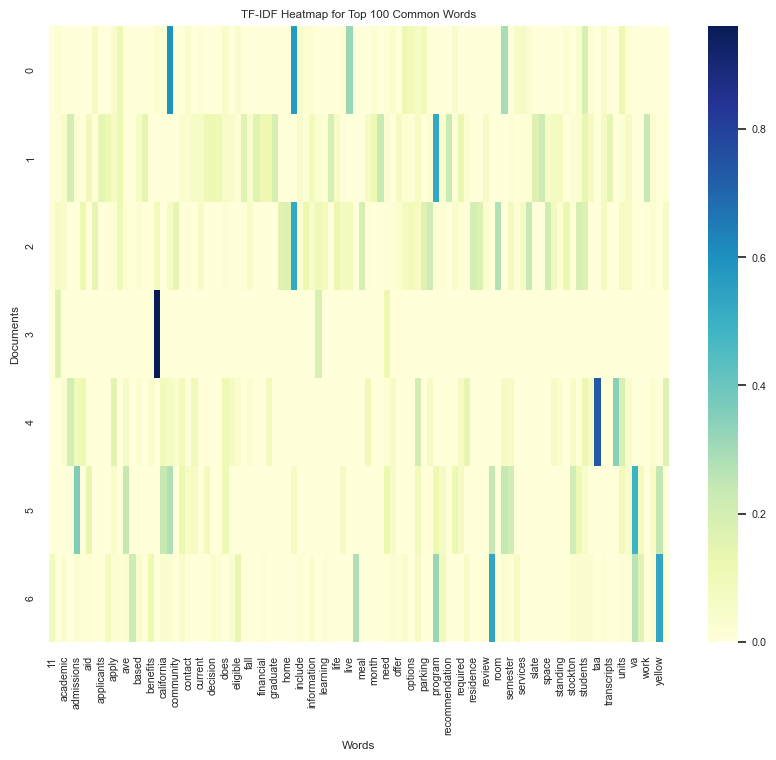

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of TF-IDF values
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Customize the heatmap appearance (optional)
sns.set(font_scale=0.7)  # Adjust the font size
sns.set_style("whitegrid")  # Add a grid for better readability

# Create the heatmap
sns.heatmap(tfidf_df.head(20), cmap="YlGnBu", annot=False)  # Display the top 100 common words

plt.title("TF-IDF Heatmap for Top 100 Common Words")
plt.xlabel("Words")
plt.ylabel("Documents")

plt.savefig("TF-IDF_Heatmap.png")

plt.show()
